# Example for Heavy Rainfall Index

Based on the IntensityDurationFrequencyAnalysis, the HeavyRainIndexAnalysis enables the creation of location-dependent heavy rain indices according to the methods of Schmitt, Mudersbach and also those of Krüger and Pfister.
Furthermore, the possibility of creating heavy rain index curves according to the Krüger and Pfister method was included and implemented for the other two methods. Thus, heavy rainfall index curves can be compared with each other. Furthermore, it is possible to assign individual rain events to a heavy rain index using existing rain data.

In [1]:
from matplotlib.colors import ListedColormap
from idf_analysis.definitions import METHOD, SERIES, COL
from idf_analysis.little_helpers import minutes_readable
from idf_analysis.sww_utils import rain_events, event_duration, agg_events
from idf_analysis.heavy_rainfall_index import HeavyRainfallIndexAnalyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

%matplotlib inline
plt.style.use('fast')

Implemented Methods for the HeavyRainIndexAnalysis:  
SCHMITT = 'Schmitt'  
KRUEGER_PFISTER = 'KruegerPfister'  
MUDERSBACH = 'Mudersbach'

In [2]:
hri = HeavyRainfallIndexAnalyse(method=HeavyRainfallIndexAnalyse.METHODS.KRUEGER_PFISTER,
                                series_kind=SERIES.PARTIAL, worksheet=METHOD.KOSTRA, extended_durations=True)

In [3]:
cmap = ListedColormap([(1,1,1)] + list(hri.indices_color.values()))

In [7]:
data = pd.read_parquet('ehyd_112086.parquet').squeeze('columns')

In [5]:
output_directory = 'Ergebnisse'

In [8]:
hri.set_series(data)

In [9]:
hri.auto_save_parameters(path.join(output_directory, 'idf_parameters.yaml'))

Calculating Parameters u and w:   0%|          | 0/21 [00:00<?, ?it/s]

_balance_parameter_change


Heavy rainfall index-matrix is created with regard to the individual procedures for SRI generation

In [10]:
hri.interim_sri_table().style.background_gradient(cmap=cmap, vmin=1, vmax=12)

Return Period in a,1,2,3,5,10,20,25,30,50,75,100
duration in min,,,,,,,,,,,
5,0,0,0,0,1,1,1,1,1,1,1
10,0,0,0,1,1,1,1,1,2,2,2
15,0,0,0,1,1,1,2,2,2,2,3
20,0,0,1,1,1,2,2,2,2,3,3
30,0,0,1,1,1,2,2,2,3,3,4
45,0,1,1,1,2,2,3,3,4,4,5
60,0,1,1,1,2,3,3,3,4,5,5
90,0,1,1,1,2,3,3,3,4,5,6
120,0,1,1,1,2,3,3,4,4,5,6


An auxiliary table must be generated for the creation of the heavy rain index-curves. Here, the rainfall heights are shown depending on the duration and the heavy rain index.

In [11]:
hri.result_sri_table().style.background_gradient(cmap=cmap, vmin=0, vmax=700).format("{:.1f}")

SRI,1,2,3,4,5,6,7,8,9,10,11,12
duration in min,,,,,,,,,,,,
5,17.9,25.2,30.9,35.7,39.9,43.7,47.2,50.5,53.6,56.5,59.2,61.8
10,22.5,31.8,38.9,44.9,50.2,55.0,59.4,63.5,67.4,71.0,74.5,77.8
15,25.4,35.9,44.0,50.8,56.8,62.2,67.2,71.8,76.2,80.3,84.2,88.0
20,27.6,39.0,47.7,55.1,61.6,67.5,72.9,77.9,82.7,87.1,91.4,95.5
30,30.7,43.4,53.2,61.4,68.7,75.2,81.2,86.8,92.1,97.1,101.8,106.4
45,34.0,48.1,58.9,68.0,76.0,83.3,90.0,96.2,102.0,107.5,112.8,117.8
60,36.5,51.6,63.2,73.0,81.6,89.4,96.5,103.2,109.5,115.4,121.0,126.4
90,37.5,53.1,65.0,75.0,83.9,91.9,99.3,106.1,112.6,118.6,124.4,130.0
120,38.3,54.1,66.3,76.5,85.6,93.7,101.3,108.2,114.8,121.0,126.9,132.6


Using heavy rainfall index curves, the necessary rainfall heights can be read off depending on the respective index.

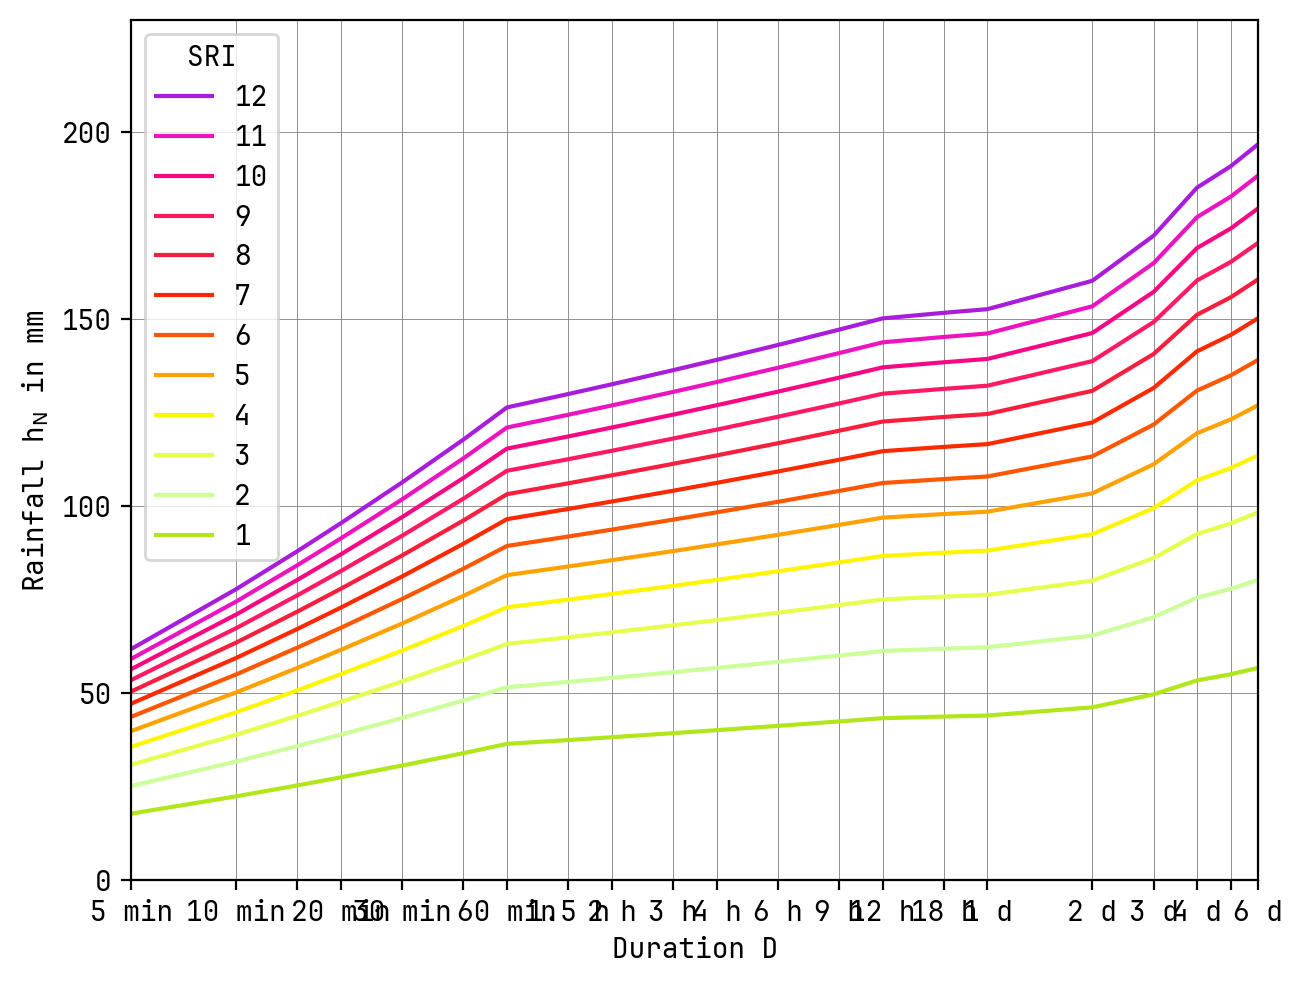

In [12]:
hri.method = hri.METHODS.KRUEGER_PFISTER
fig, ax = hri.result_sri_figure()
ax.legend(loc='upper left')
ax.grid(color='grey', linestyle='-', linewidth=0.3)
ax.set_ylim(0, 230)
old_labels = ax.get_xticklabels()
old_labels[2] = ''
old_labels[5] = ''
old_labels[19] = ''
ax.set_xticklabels(old_labels)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='SRI', loc='upper left')
plt.savefig("kruegerpfister.svg")

Heavy rain index allocation of a specific rain event

In [13]:
events = rain_events(hri.series, min_gap=pd.Timedelta(days=2))
events[COL.DUR] = event_duration(events)
events[COL.LP] = agg_events(events, hri.series, 'sum').round(1)
events[COL.LAST] = events[COL.START] - events[COL.END].shift()

hri.add_max_return_periods_to_events(events)

events = events[events[COL.LP] > 10]
events = events[events[COL.MAX_PERIOD] > 2]

events.sort_values(COL.LP)

calculating rainfall_sum data-frame:   0%|          | 0/21 [00:00<?, ?it/s]

calculating return_periods data-frame:   0%|          | 0/21 [00:00<?, ?it/s]

/Users/markus/PycharmProjects/intensity_duration_frequency_analysis/idf_analysis/idf_class.py:637: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  events[COL.MAX_PERIOD_DURATION] = return_periods_frame.loc[datetime_max].idxmax(axis=1, skipna=True).values


,start,end,duration,rain_sum,last_event,max_return_period,max_return_period_duration
40,2008-07-20 17:43:00,2008-07-21 08:57:00,0 days 15:14:00,28.0,2 days 02:48:00,3.630218,5760.0
36,2008-06-23 19:50:00,2008-06-24 19:48:00,0 days 23:58:00,35.8,2 days 21:52:00,5.811032,15.0
94,2009-08-27 19:52:00,2009-08-29 13:25:00,1 days 17:33:00,55.1,4 days 23:06:00,21.185639,20.0
86,2009-07-18 08:55:00,2009-07-18 13:19:00,0 days 04:24:00,58.0,2 days 01:56:00,3.822592,240.0
93,2009-08-21 19:49:00,2009-08-22 20:46:00,1 days 00:57:00,64.2,4 days 03:04:00,4.289044,20.0
425,2016-05-30 12:38:00,2016-06-06 12:54:00,7 days 00:16:00,66.4,4 days 17:44:00,6.888510,5.0
95,2009-09-04 00:31:00,2009-09-05 01:32:00,1 days 01:01:00,69.8,5 days 11:06:00,3.212079,1080.0
186,2011-07-27 20:38:00,2011-08-04 07:44:00,7 days 11:06:00,70.5,3 days 05:30:00,13.694970,20.0
383,2015-07-08 11:50:00,2015-07-09 00:25:00,0 days 12:35:00,77.8,8 days 13:53:00,7.097631,720.0
528,2018-06-12 17:00:00,2018-06-13 22:27:00,1 days 05:27:00,85.1,3 days 16:11:00,12.150533,15.0


In [14]:
hri.add_max_return_periods_to_events(hri.rain_events)

/Users/markus/PycharmProjects/intensity_duration_frequency_analysis/idf_analysis/idf_class.py:637: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  events[COL.MAX_PERIOD_DURATION] = return_periods_frame.loc[datetime_max].idxmax(axis=1, skipna=True).values


In [15]:
hri.rain_events.sort_values('max_return_period', ascending=False).head()

,start,end,duration,rain_sum,last_event,max_return_period,max_return_period_duration
773,2013-05-07 20:58:00,2013-05-07 21:37:00,0 days 00:39:00,2.0,0 days 08:18:00,40.647557,2880.0
772,2013-05-05 20:47:00,2013-05-07 12:40:00,1 days 15:53:00,119.5,0 days 17:31:00,38.092370,2880.0
282,2009-08-28 23:41:00,2009-08-29 00:42:00,0 days 01:01:00,49.3,1 days 03:44:00,21.185639,20.0
544,2011-08-03 19:53:00,2011-08-04 07:44:00,0 days 11:51:00,54.7,1 days 23:11:00,13.694970,20.0
1532,2018-06-13 14:58:00,2018-06-13 22:27:00,0 days 07:29:00,63.5,0 days 21:27:00,12.150533,15.0


In [22]:
event = hri.rain_events.loc[797].copy()

event[COL.START] = pd.to_datetime('2013-05-06 20:00:00')
event

start                         2013-05-06 20:00:00
end                           2013-06-22 15:59:00
duration                          0 days 00:59:00
rain_sum                                      1.6
last_event                        6 days 13:51:00
max_return_period                        0.087558
max_return_period_duration                   60.0
Name: 797, dtype: object

In [17]:
rainfall_sum_frame = hri.rainfall_sum_frame[event[COL.START]:event[COL.END]]
return_periods_frame = hri.return_periods_frame[event[COL.START]:event[COL.END]]

calculating rainfall_sum data-frame:   0%|          | 0/21 [00:00<?, ?it/s]

In [18]:
rainfall_sum_frame.\
    max().\
    rename('max. Regensumme').\
    to_frame().\
    rename(minutes_readable).\
    style.bar(vmin=0, vmax=100).format("{:.1f}")

,max. Regensumme
5 min,9.9
10 min,16.3
15 min,21.9
20 min,28.2
30 min,40.7
45 min,46.3
60 min,57.0
1.5 h,69.6
2 h,74.3
3 h,76.5


In [19]:
return_periods_frame.\
    max().\
    rename('max. Wiederkehrperiode').\
    to_frame().\
    rename(minutes_readable).\
    style.bar(vmin=0, vmax=100).format("{:.1f}")

,max. Wiederkehrperiode
5 min,1.4
10 min,1.6
15 min,2.1
20 min,3.4
30 min,8.4
45 min,6.6
60 min,10.2
1.5 h,21.4
2 h,24.6
3 h,20.7


In [20]:
sri_table_event = pd.DataFrame(index=hri.duration_steps)

hri.method = hri.METHODS.KRUEGER_PFISTER
sri_table_event[hri.METHODS.KRUEGER_PFISTER] = hri.get_event_sri_max(event[COL.START], event[COL.END])

hri.method = hri.METHODS.MUDERSBACH
sri_table_event[hri.METHODS.MUDERSBACH] = hri.get_event_sri_max(event[COL.START], event[COL.END])

hri.method = hri.METHODS.SCHMITT
sri_table_event[hri.METHODS.SCHMITT] = hri.get_event_sri_max(event[COL.START], event[COL.END])

Specific rain event with allocation of heavy rain indices depending on the method and duration. 

In [21]:
cmap = ListedColormap([(1,1,1)] + list(hri.indices_color.values()))
_df = sri_table_event.astype(int).copy()
_df['max. Wiederkehrperiode'] = return_periods_frame.max()
_df['max. Regensumme'] = rainfall_sum_frame.max()
_df.rename(minutes_readable).style.\
    background_gradient(subset=[hri.METHODS.SCHMITT,
                                hri.METHODS.KRUEGER_PFISTER,
                                hri.METHODS.MUDERSBACH], cmap=cmap, vmin=0, vmax=12).\
    bar(subset=['max. Wiederkehrperiode', 'max. Regensumme'], vmin=0, vmax=100).format("{:.1f}", subset=['max. Wiederkehrperiode', 'max. Regensumme'])

,KruegerPfister,Mudersbach,Schmitt,max. Wiederkehrperiode,max. Regensumme
5 min,1,1,1,1.4,9.9
10 min,1,2,1,1.6,16.3
15 min,1,2,2,2.1,21.9
20 min,1,3,2,3.4,28.2
30 min,2,5,3,8.4,40.7
45 min,2,4,3,6.6,46.3
60 min,2,5,4,10.2,57.0
1.5 h,3,6,4,21.4,69.6
2 h,4,7,4,24.6,74.3
3 h,4,7,4,20.7,76.5
